# Pycaret

In [ ]:
# pip install pycaret==2.3.10

In [ ]:
# pip install jinja2==3.1.2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/customer')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import customer_data

from pycaret import regression
from pycaret.regression import setup, create_model, compare_models
from pycaret.regression import blend_models, predict_model, finalize_model

Mounted at /content/drive


In [4]:
train, test, _, _ = customer_data.load_data(test_size=0,encoding=False)
train.drop(['id'], axis=1, inplace=True)
train.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Age_Range,Complain,Days_Customer,Education,Income,Income_Level,Income_Per,Kidhome,Marital_Status,NumAcceptedCmp,NumCatalogPurchases,NumDealsPurchases,NumPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Perferred_Purchase,Recency,Response,Teenhome,target
0,0,0,0,0,0,48,4,0,3267,3,46014.0,0.283343,23007.0,1,3,0,1,10,16,8,7,7,2,21,0,1,541
1,0,0,1,0,0,60,6,0,2779,2,76624.0,0.775727,76624.0,0,2,1,10,1,22,7,5,1,1,68,0,1,899
2,0,0,0,0,0,71,7,0,3190,2,75903.0,0.667373,75903.0,0,1,0,6,2,21,9,6,3,2,50,0,1,901
3,0,0,0,0,0,48,4,0,2835,1,18393.0,0.113259,9196.5,1,1,0,0,2,6,3,3,8,0,2,0,0,50
4,1,0,0,0,0,76,7,0,2762,4,64014.0,0.562840,21338.0,2,3,1,2,7,15,5,8,7,0,56,0,1,444


In [5]:
model = regression.setup(data=train, target='target',train_size=0.7,session_id=0,silent=True)

,Description,Value
0,session_id,0
1,Target,target
2,Original Data,"(1102, 27)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,19
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(771, 112)"


In [6]:
top_3_models = regression.compare_models(sort='MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.135424e+02,4.397990e+04,2.066704e+02,8.778000e-01,0.2640,2.099000e-01,0.903
rf,Random Forest Regressor,1.181492e+02,4.429187e+04,2.069502e+02,8.758000e-01,0.2643,2.102000e-01,0.930
lightgbm,Light Gradient Boosting Machine,1.231632e+02,4.640878e+04,2.126591e+02,8.693000e-01,0.3750,2.576000e-01,0.113
gbr,Gradient Boosting Regressor,1.281412e+02,4.958125e+04,2.202284e+02,8.605000e-01,0.3764,3.356000e-01,0.250
dt,Decision Tree Regressor,1.609509e+02,9.167058e+04,2.976864e+02,7.465000e-01,0.3769,2.683000e-01,0.028
lasso,Lasso Regression,1.641405e+02,5.602583e+04,2.336813e+02,8.413000e-01,0.7914,1.102900e+00,0.032
br,Bayesian Ridge,1.650330e+02,5.637430e+04,2.343831e+02,8.403000e-01,0.7640,1.151000e+00,0.028
ridge,Ridge Regression,1.675767e+02,5.844351e+04,2.385175e+02,8.352000e-01,0.7668,1.076100e+00,0.014
llar,Lasso Least Angle Regression,1.741903e+02,6.112755e+04,2.445372e+02,8.288000e-01,0.7432,1.073300e+00,0.018
lr,Linear Regression,1.776311e+02,6.301187e+04,2.474458e+02,8.228000e-01,0.8062,1.314200e+00,0.330


In [7]:
blended = regression.blend_models(estimator_list=top_3_models, fold=10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114.0313,49852.0871,223.2758,0.8640,0.2802,0.2193
1,102.4342,27716.4664,166.4826,0.9181,0.2237,0.1854
2,119.0809,45830.4971,214.0806,0.8884,0.2028,0.1546
3,97.0507,24808.0359,157.5057,0.8842,0.2374,0.1959
4,89.5628,25772.5426,160.5383,0.9379,0.1991,0.1485
5,124.0340,45562.9195,213.4547,0.8919,0.2903,0.2355
6,95.8976,31273.6782,176.8437,0.9085,0.2555,0.2007
7,104.1613,39274.4346,198.1778,0.8774,0.2895,0.2530
8,119.6637,53408.6753,231.1032,0.8202,0.3984,0.2685


In [8]:
final_blended = regression.finalize_model(blended)
pred_train = regression.predict_model(final_blended, data=train)
true_pred = pd.DataFrame([train['target'],pred_train['Label']]).T
true_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,26.0224,2191.203,46.8103,0.994,0.0975,0.0627


,target,Label
0,541.0,545.689672
1,899.0,914.717236
2,901.0,970.166690
3,50.0,47.799308
4,444.0,471.412134


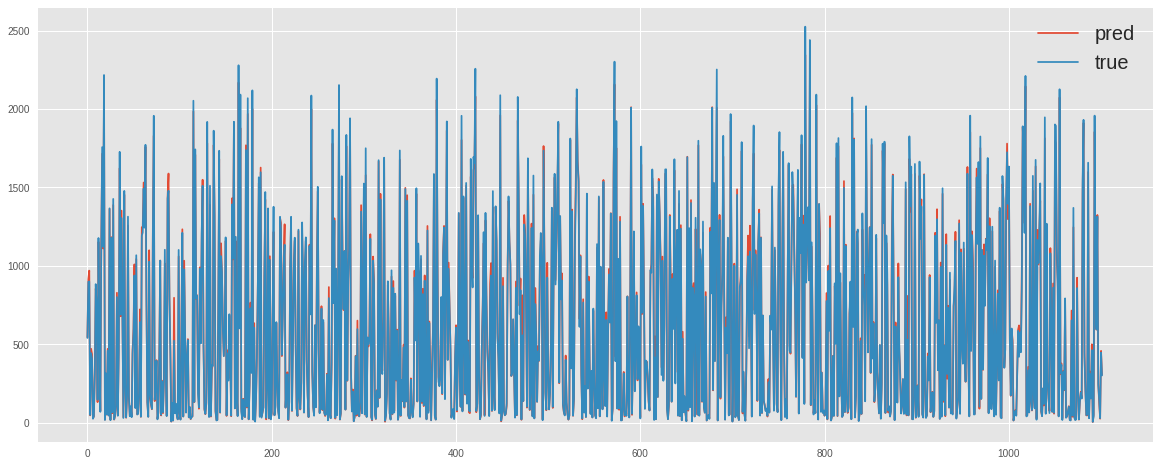

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 8))
plt.plot(true_pred['Label'], label='pred')
plt.plot(true_pred['target'], label='true')
plt.legend(fontsize=20)
plt.show()

In [ ]:
regression.save_model(final_blended, 'model_pycaret')

In [ ]:
from google.colab import files
files.download('model_pycaret.pkl')